In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.parasite_axes import HostAxes
import numpy as np
import os
import os.path
import json as Json

/tmp/ipykernel_32741/1419944762.py:46: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)
/tmp/ipykernel_32741/1419944762.py:63: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)


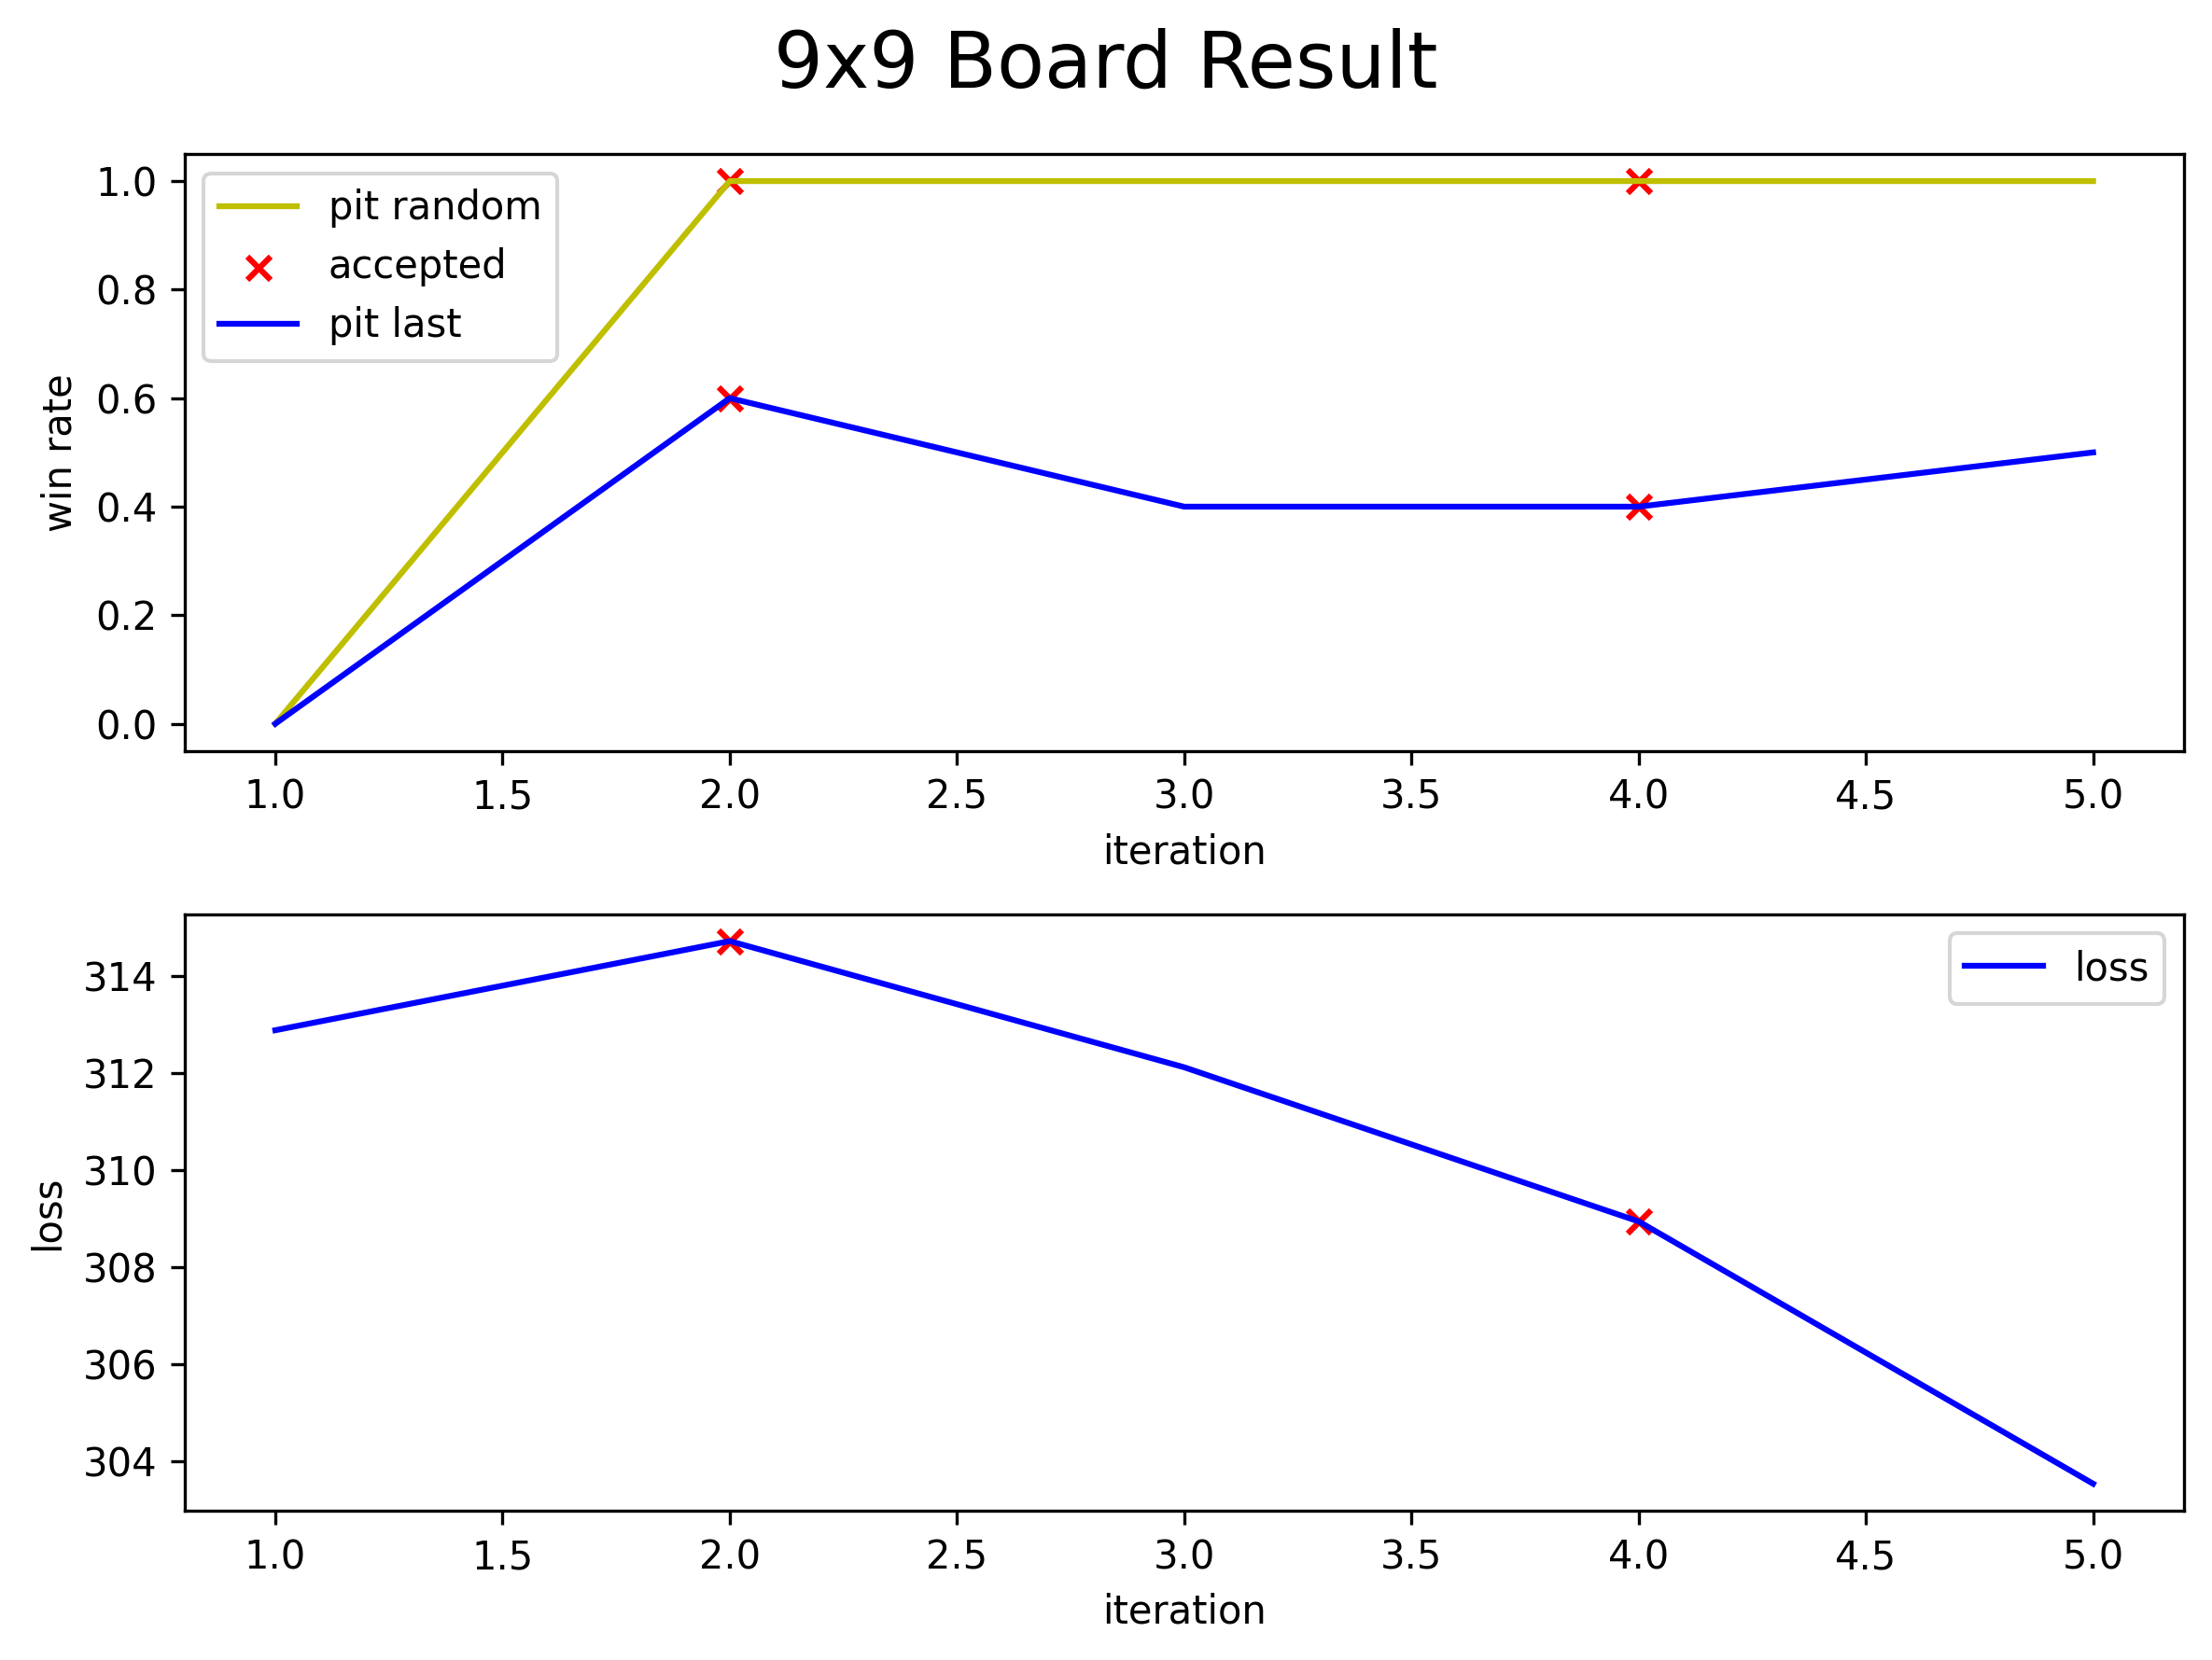

In [54]:
log_file = '9x9_rst1/itr_info_20230624-0043.mutijson'
title = '9x9 Board Result'

logs = []
with open(log_file, 'r') as f:
    for line in f:
        logs.append(Json.loads(line))

itr = []
time = []
loss = []
pit_rdm = []
pit_lst = []
accept = []
for log in logs:
    itr.append(log['itr'])
    time.append(log['time'])
    loss.append(log['loss'])
    pit_rdm.append(log['pit_random'])
    pit_lst.append(log['pit_last'])
    accept.append(log['accept'])

time_st = time[0]
time = [t - time_st for t in time]
win_rate_rdm = [0] * len(itr)
win_rate_lst = [0] * len(itr)
for i in range(1, len(itr)):
    if pit_rdm[i] is None:
        pit_rdm[i] = pit_rdm[i-1]
    if pit_lst[i] is None:
        pit_lst[i] = pit_lst[i-1]
    
    win_rate_rdm[i] = pit_rdm[i][0] / (pit_rdm[i][0] + pit_rdm[i][1] + pit_rdm[i][2])
    win_rate_lst[i] = pit_lst[i][0] / (pit_lst[i][0] + pit_lst[i][1] + pit_lst[i][2])

itr = np.array(itr)
win_rate_rdm = np.array(win_rate_rdm)
win_rate_lst = np.array(win_rate_lst)


accept_pos = np.where(np.array(accept) == 1)

fig, ax = plt.subplots(2, 2, figsize=(8, 6), dpi=300)
fig.suptitle(title, fontsize=20)

plt.subplot(2, 1, 1)
plt.plot(itr, win_rate_rdm, label='pit random', c="y")
plt.scatter(
    np.take(itr, accept_pos), 
    np.take(win_rate_rdm, accept_pos), 
    c='r', marker='x', label='accepted'
)
plt.plot(itr, win_rate_lst, label='pit last', c="b")
plt.scatter(
    np.take(itr, accept_pos), 
    np.take(win_rate_lst, accept_pos), 
    c='r', marker='x'
)
plt.legend()
plt.xlabel('iteration')
plt.ylabel('win rate')

plt.subplot(2, 1, 2)
plt.plot(itr, loss, label='loss', c="b")
plt.scatter(
    np.take(itr, accept_pos),
    np.take(loss, accept_pos),
    c='r', marker='x'
)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()

plt.tight_layout()
plt.show()